# Wine Analysis Utilizing Machine Learning Ensemble Techniques
### By: Jose Salerno

---



---



# Notebook Outline:

## 1. Motivation

## 2. Introduction

## 3. Exploratory Phase (EDA)

## 4. Models Creation Red Wines
    A. Voting
    B. Stacking
    C. Bagging
    D. Random Forest Classifier
    E. Boosting
    F. Final Model Prediction

## 5. Visualizations Red Wines

## 6. Models Creation White Wines
    A. Voting
    B. Stacking
    C. Bagging
    D. Random Forest Classifier
    E. Boosting
    F. Final Model Prediction


## 7. Visualizations White Wines

## 8. Limitations

## 9. Conclusion

## 10. References

---


---

# 1. Motivation:
- The present project was commenced with a profound love for wine as the driving force. By combining this passion with the knowledge acquired from a recent machine learning course, the aim was to implement various ensemble models in practical applications. Ultimately, the goal is to develop a tool that assists wine enthusiasts in selecting the perfect bottle based on their taste and preferences. Additionally, this project intends to gain a deeper understanding of the variables that have a significant impact on wine quality. To perform this analysis, I utilized the concepts and labs taught in Questroms School of Business Supervised Machine Learning Course.

# 2. Introduction:

Background:

- What is Voting:
    - Voting combines multiple base models, obtains their predictions, and then obtains the majority vote of all those models to make one output prediction.

- What is Stacking:
    - Stacking is training multiple base models that improve where the previous models made an error—then training a final meta-model with Cross Validation predictions and obtaining a final prediction.

- What is Bagging:
    - Bagging utilizes bootstrap to draw random samples with replacement, an ensemble method that can reduce variance within noisy data. This process trains various models independently and then combines the votes of their predictions. In this example, I utilized mode since it is a classification problem.

- What is a Random Forest:
    - Random Forest is a Bagging technique that considers subsets of features for each tree node splitting using decision trees. Random Forest combines various classifiers to enhance the model's performance.

- What is Boosting:
    - Boosting is the process of sequentially training models that learn from the error of the previous models. It fits weaker learners to the residuals and then creates a prediction. We set the gamma, which is the learning rate hyperparameter.


Data Source: https://archive.ics.uci.edu/


# 3. Exploratory Phase (EDA) and Cleaning

In [ ]:
import numpy as np
import seaborn as sns
import pandas as pd

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
red = pd.read_csv('/content/gdrive/MyDrive/Personal_Projects/Datasets/wine+quality/winequality-red.csv', delimiter=';')
white = pd.read_csv('/content/gdrive/MyDrive/Personal_Projects/Datasets/wine+quality/winequality-white.csv', delimiter=';')

In [ ]:
red

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [ ]:
white

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7


In [ ]:
red.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [ ]:
white.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


In [ ]:
red.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [ ]:
white.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB




---



---



# 4. Model Creation Red Wines

In [ ]:
from sklearn.model_selection import train_test_split
X = red.drop('quality', axis = 1)
y = red['quality'].copy()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 17)

In [ ]:
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer, make_column_selector
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import Lasso


num_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('lasso', SelectFromModel(Lasso(alpha = 0.1)))
])
prep_pipeline = ColumnTransformer([
    ('num', num_pipeline, make_column_selector(dtype_include = np.number))
])
prep_pipeline

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('scaler', StandardScaler()),
                                                 ('lasso',
                                                  SelectFromModel(estimator=Lasso(alpha=0.1)))]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7c9e50a9bbe0>)])

## A. Voting

In [ ]:
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC


voting_clf = VotingClassifier(
    estimators = [
        ('lr', LogisticRegression(random_state = 17)),
        ('dt', DecisionTreeClassifier(random_state = 17)),
        ('svc', SVC(random_state = 17))
    ]
)

voting_clf.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


VotingClassifier(estimators=[('lr', LogisticRegression(random_state=17)),
                             ('dt', DecisionTreeClassifier(random_state=17)),
                             ('svc', SVC(random_state=17))])

In [ ]:
for name, clf in voting_clf.named_estimators_.items():
    print(f'Accuracy of {name} is {clf.score(X_train, y_train):.4f}')

print(f'Them voting give {voting_clf.score(X_train, y_train):.4f}')

Accuracy of lr is 0.0000
Accuracy of dt is 0.0000
Accuracy of svc is 0.0054
Them voting give 0.6979


## B. Stacking

In [ ]:
from sklearn.ensemble import StackingClassifier
from sklearn.ensemble import RandomForestClassifier

stacking_clf = StackingClassifier(
    estimators = [
        ('lr', LogisticRegression(random_state = 17)),
        ('dt', DecisionTreeClassifier(random_state = 17)),
        ('svc', SVC(random_state = 17))
    ],
    final_estimator= RandomForestClassifier(random_state = 17),
    cv = 5
)

stacking_clf.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

StackingClassifier(cv=5,
                   estimators=[('lr', LogisticRegression(random_state=17)),
                               ('dt', DecisionTreeClassifier(random_state=17)),
                               ('svc', SVC(random_state=17))],
                   final_estimator=RandomForestClassifier(random_state=17))

In [ ]:
print(f'Stacking the three has accuracy of {stacking_clf.score(X_train, y_train):.4f}')

Stacking the three has accuracy of 0.7721


## C. Bagging

In [ ]:
from sklearn.ensemble import BaggingClassifier

bag_clf = BaggingClassifier(DecisionTreeClassifier(),
                            n_estimators = 500,
                            oob_score = True,
                            random_state = 17)
bag_clf.fit(X_train, y_train)
print(f'Bagging {bag_clf.n_estimators} trees leads to accuracy of {bag_clf.score(X_train, y_train):.4f}.')

Bagging 500 trees leads to accuracy of 1.0000.


In [ ]:
print(f'The out-of-bag accuracy from using {bag_clf.n_estimators} trees is {bag_clf.oob_score_:.4f}')

The out-of-bag accuracy from using 500 trees is 0.6810


## D. Random Forest Classifier

In [ ]:
random_classifier = RandomForestClassifier(n_estimators = 500, max_leaf_nodes = 16,
                                           max_features = 'sqrt', n_jobs = 10, random_state = 17)
random_classifier.fit(X_train, y_train)
print(f'Random forest of {random_classifier.n_estimators} trees leads to accuracy of {random_classifier.score(X_train, y_train):.4f}.')

Random forest of 500 trees leads to accuracy of 0.6586.


In [ ]:
import matplotlib.pyplot as plt
prep_pipeline.fit(X_train, y_train)


ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('scaler', StandardScaler()),
                                                 ('lasso',
                                                  SelectFromModel(estimator=Lasso(alpha=0.1)))]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7c9e50a9bbe0>)])

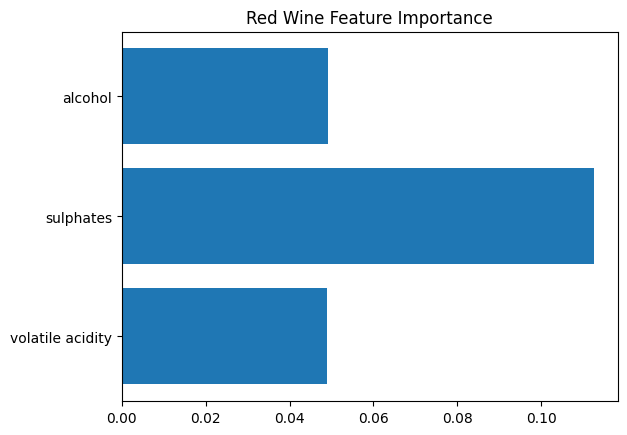

In [ ]:
lasso_step = prep_pipeline.named_transformers_['num']['lasso']
lasso_selected_features = lasso_step.get_support()
feature_names = X_train.columns[lasso_selected_features]
feature_importances = random_classifier.feature_importances_[:len(feature_names)]

# Plot the bar chart
plt.barh(feature_names, feature_importances)
plt.title('Red Wine Feature Importance')
plt.show()

## E. Boosting

In [ ]:
from sklearn.ensemble import HistGradientBoostingClassifier
hgb_clf = HistGradientBoostingClassifier(max_leaf_nodes = 16, max_iter = 10, learning_rate = 0.1)
hgb_clf.fit(X_train, y_train)
print(f'Gradient Boosting with {hgb_clf.max_iter} trees leads to accuracy of {hgb_clf.score(X_train, y_train)}')

Gradient Boosting with 10 trees leads to accuracy of 0.7971403038427167


###  Random Search

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import loguniform, randint

param_grid = {'max_leaf_nodes': randint(2, 16),
              'max_iter': randint(2, 32),
              'learning_rate': loguniform(1e-2, 1)}

rand_search = RandomizedSearchCV(HistGradientBoostingClassifier(random_state=17),
                                 param_grid, cv=5, n_iter = 50, scoring='accuracy',
                                 random_state=42)

rand_search.fit(X_train, y_train)
rand_cv_res = pd.DataFrame(rand_search.cv_results_)
rand_cv_res.sort_values(by="mean_test_score", ascending=False, inplace=True)
rand_cv_res.filter(regex = '(^param_|mean_test_score)', axis=1).head()

,param_learning_rate,param_max_iter,param_max_leaf_nodes,mean_test_score
43,0.33233,27,8,0.643434
26,0.138321,29,10,0.634517
0,0.056115,30,12,0.620223
29,0.051702,29,13,0.614862
2,0.077923,24,12,0.614850


## F. Red Wine Final Model Predictions

In [ ]:
from sklearn.metrics import mean_squared_error
final_model = rand_search.best_estimator_
final_predictions = final_model.predict(X_test)
final_rmse = mean_squared_error(y_test, final_predictions, squared = False)
print(f'The RMSE of the selected model {final_rmse:.3f}')

The RMSE of the selected model 0.996


# 5. Visualizations Red Wines

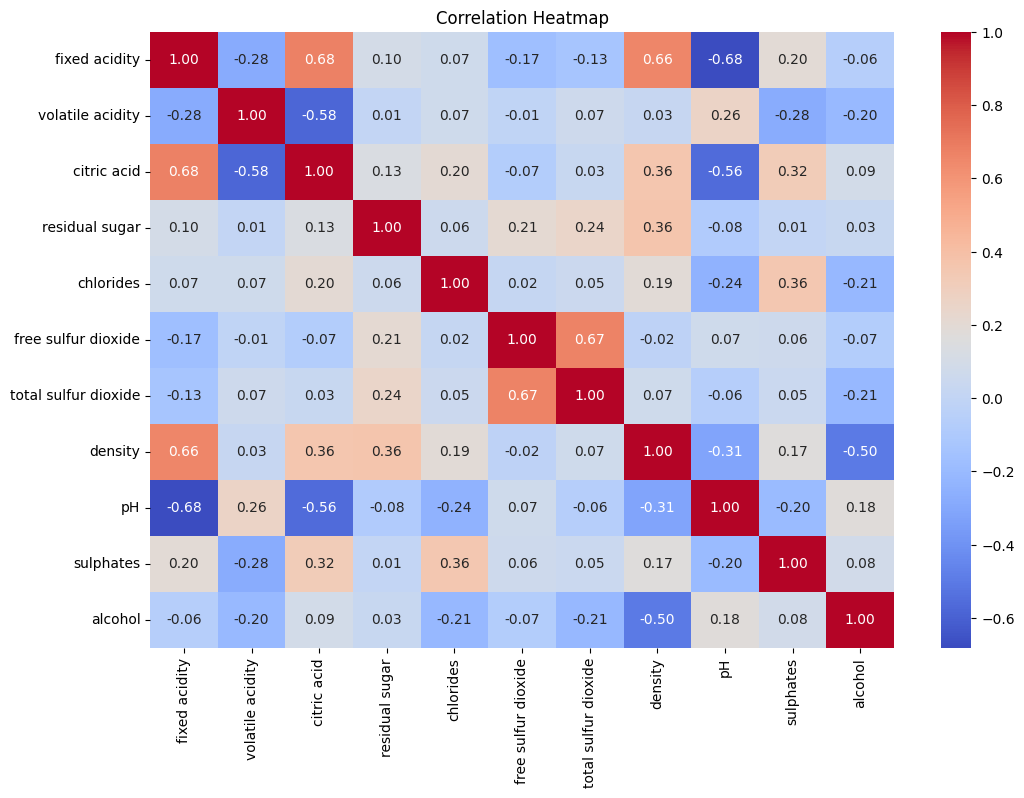

In [ ]:
corr_matrix = X_train.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

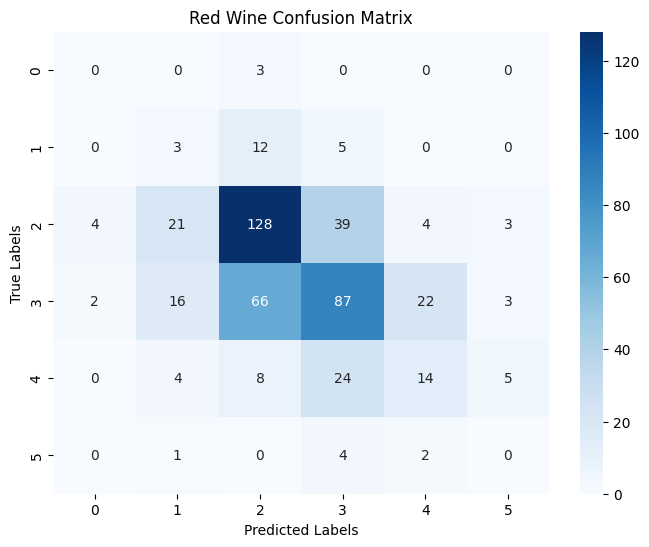

In [ ]:
from sklearn.metrics import confusion_matrix

y_pred = final_model.predict(X_test)
confusion_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Red Wine Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

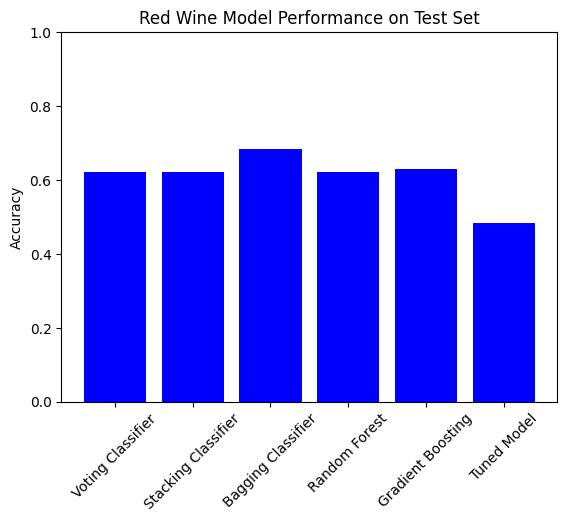

In [ ]:
models = ['Voting Classifier', 'Stacking Classifier', 'Bagging Classifier', 'Random Forest', 'Gradient Boosting', 'Tuned Model']
accuracies = [voting_clf.score(X_test, y_test), stacking_clf.score(X_test, y_test), bag_clf.score(X_test, y_test),
              random_classifier.score(X_test, y_test), hgb_clf.score(X_test, y_test), final_model.score(X_test, y_test)]

plt.bar(models, accuracies, color='blue')
plt.ylim(0, 1)
plt.title('Red Wine Model Performance on Test Set')
plt.xticks(rotation=45)
plt.ylabel('Accuracy')
plt.show()

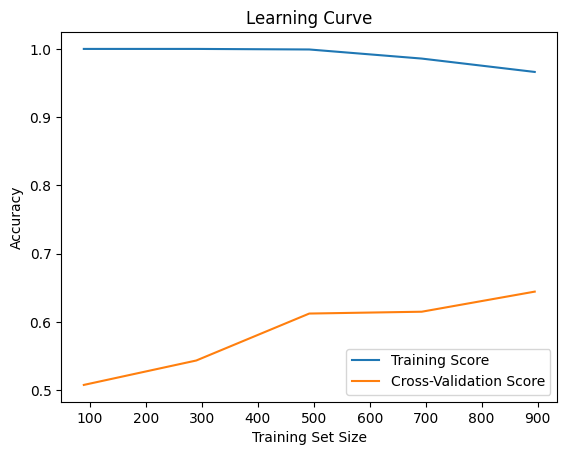

In [ ]:
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve(final_model, X_train, y_train, cv=5)
plt.plot(train_sizes, np.mean(train_scores, axis=1), label='Training Score')
plt.plot(train_sizes, np.mean(test_scores, axis=1), label='Cross-Validation Score')
plt.xlabel('Training Set Size')
plt.ylabel('Accuracy')
plt.title('Learning Curve')
plt.legend()
plt.show()




---



---




# 6. Models Creation White Wines

In [ ]:
from sklearn.model_selection import train_test_split
X_w = white.drop('quality', axis = 1)
y_w = white['quality'].copy()
X_train_w, X_test_w, y_train_w, y_test_w = train_test_split(X_w, y_w, test_size = 0.3, random_state = 17)

### Pipeline

In [ ]:
num_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('lasso', SelectFromModel(Lasso(alpha = 0.1)))
])
prep_pipeline = ColumnTransformer([
    ('num', num_pipeline, make_column_selector(dtype_include = np.number))
])
prep_pipeline

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('scaler', StandardScaler()),
                                                 ('lasso',
                                                  SelectFromModel(estimator=Lasso(alpha=0.1)))]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7c9e50df05b0>)])

## A. Voting

In [ ]:
voting_clf_white = VotingClassifier(
    estimators = [
        ('lr', LogisticRegression(random_state = 17)),
        ('dt', DecisionTreeClassifier(random_state = 17)),
        ('svc', SVC(random_state = 17))
    ]
)

voting_clf_white.fit(X_train_w, y_train_w)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


VotingClassifier(estimators=[('lr', LogisticRegression(random_state=17)),
                             ('dt', DecisionTreeClassifier(random_state=17)),
                             ('svc', SVC(random_state=17))])

In [ ]:
for name, clf in voting_clf.named_estimators_.items():
    print(f'Accuracy of {name} is {clf.score(X_train_w, y_train_w):.4f}')

print(f'Them voting give {voting_clf.score(X_train_w, y_train_w):.4f}')

Accuracy of lr is 0.0023
Accuracy of dt is 0.0096
Accuracy of svc is 0.0006
Them voting give 0.3258


## B. Stacking

In [ ]:
stacking_clf_white = StackingClassifier(
    estimators = [
        ('lr', LogisticRegression(random_state = 17)),
        ('dt', DecisionTreeClassifier(random_state = 17)),
        ('svc', SVC(random_state = 17))
    ],
    final_estimator= RandomForestClassifier(random_state = 17),
    cv = 5
)

stacking_clf_white.fit(X_train_w, y_train_w)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modu

StackingClassifier(cv=5,
                   estimators=[('lr', LogisticRegression(random_state=17)),
                               ('dt', DecisionTreeClassifier(random_state=17)),
                               ('svc', SVC(random_state=17))],
                   final_estimator=RandomForestClassifier(random_state=17))

In [ ]:
print(f'Stacking the three has accuracy of {stacking_clf.score(X_train_w, y_train_w):.4f}')

Stacking the three has accuracy of 0.4466


## C. Bagging

In [ ]:
bag_clf_white= BaggingClassifier(DecisionTreeClassifier(),
                            n_estimators = 500,
                            oob_score = True,
                            random_state = 17)
bag_clf_white.fit(X_train, y_train)
print(f'Bagging {bag_clf_white.n_estimators} trees leads to accuracy of {bag_clf.score(X_train_w, y_train_w):.4f}.')

Bagging 500 trees leads to accuracy of 0.4942.


In [ ]:
print(f'The out-of-bag accuracy from using {bag_clf_white.n_estimators} trees is {bag_clf_white.oob_score_:.4f}')

The out-of-bag accuracy from using 500 trees is 0.6810


## D. Random Forest Classifier

In [ ]:
random_classifier_white = RandomForestClassifier(n_estimators = 500, max_leaf_nodes = 16,
                                           max_features = 'sqrt', n_jobs = 10, random_state = 17)
random_classifier_white.fit(X_train_w, y_train_w)
print(f'Random forest of {random_classifier_white.n_estimators} trees leads to accuracy of {random_classifier_white.score(X_train_w, y_train_w):.4f}.')

Random forest of 500 trees leads to accuracy of 0.5718.


In [ ]:
prep_pipeline.fit(X_train_w, y_train_w)

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('scaler', StandardScaler()),
                                                 ('lasso',
                                                  SelectFromModel(estimator=Lasso(alpha=0.1)))]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7c9e50df05b0>)])

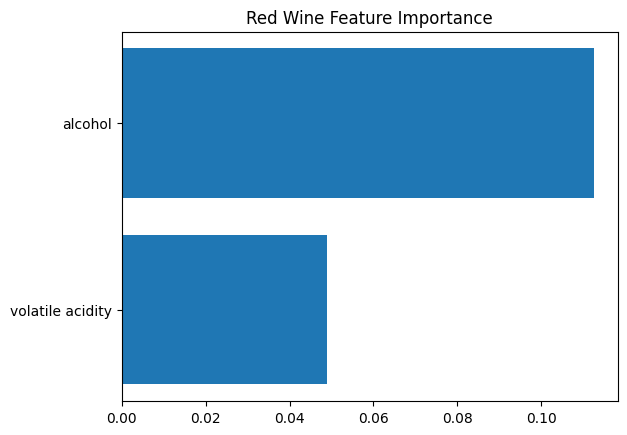

In [ ]:
lasso_step_w = prep_pipeline.named_transformers_['num']['lasso']
lasso_selected_features_w = lasso_step_w.get_support()
feature_names_w = X_train_w.columns[lasso_selected_features_w]
feature_importances_w = random_classifier.feature_importances_[:len(feature_names_w)]

# Plot the bar chart
plt.barh(feature_names_w, feature_importances_w)
plt.title('Red Wine Feature Importance')
plt.show()

## E. Boosting

In [ ]:
from sklearn.ensemble import HistGradientBoostingClassifier
hgb_clf_w = HistGradientBoostingClassifier(max_leaf_nodes = 16, max_iter = 10, learning_rate = 0.1)
hgb_clf_w.fit(X_train_w, y_train_w)
print(f'Gradient Boosting with {hgb_clf_w.max_iter} trees leads to accuracy of {hgb_clf_w.score(X_train_w, y_train_w)}')

Gradient Boosting with 10 trees leads to accuracy of 0.6505250875145857


### Random Search

In [ ]:
param_grid = {'max_leaf_nodes': randint(2, 16),
              'max_iter': randint(2, 32),
              'learning_rate': loguniform(1e-2, 1)}

rand_search_w = RandomizedSearchCV(HistGradientBoostingClassifier(random_state=17),
                                 param_grid, cv=5, n_iter = 50, scoring='accuracy',
                                 random_state=42)

rand_search_w.fit(X_train_w, y_train_w)
rand_cv_res_w = pd.DataFrame(rand_search_w.cv_results_)
rand_cv_res_w.sort_values(by="mean_test_score", ascending=False, inplace=True)
rand_cv_res_w.filter(regex = '(^param_|mean_test_score)', axis=1).head()

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(


,param_learning_rate,param_max_iter,param_max_leaf_nodes,mean_test_score
26,0.138321,29,10,0.576724
2,0.077923,24,12,0.576432
29,0.051702,29,13,0.572640
0,0.056115,30,12,0.572347
45,0.111036,16,11,0.566221


## F. White Wine Final Model Predictions

In [ ]:
final_model_w = rand_search_w.best_estimator_
final_predictions_w = final_model_w.predict(X_test_w)
final_rmse_w = mean_squared_error(y_test_w, final_predictions_w, squared = False)
print(f'The RMSE of the selected model {final_rmse_w:.3f}')

The RMSE of the selected model 0.900


# 7. Visualizations White Wines

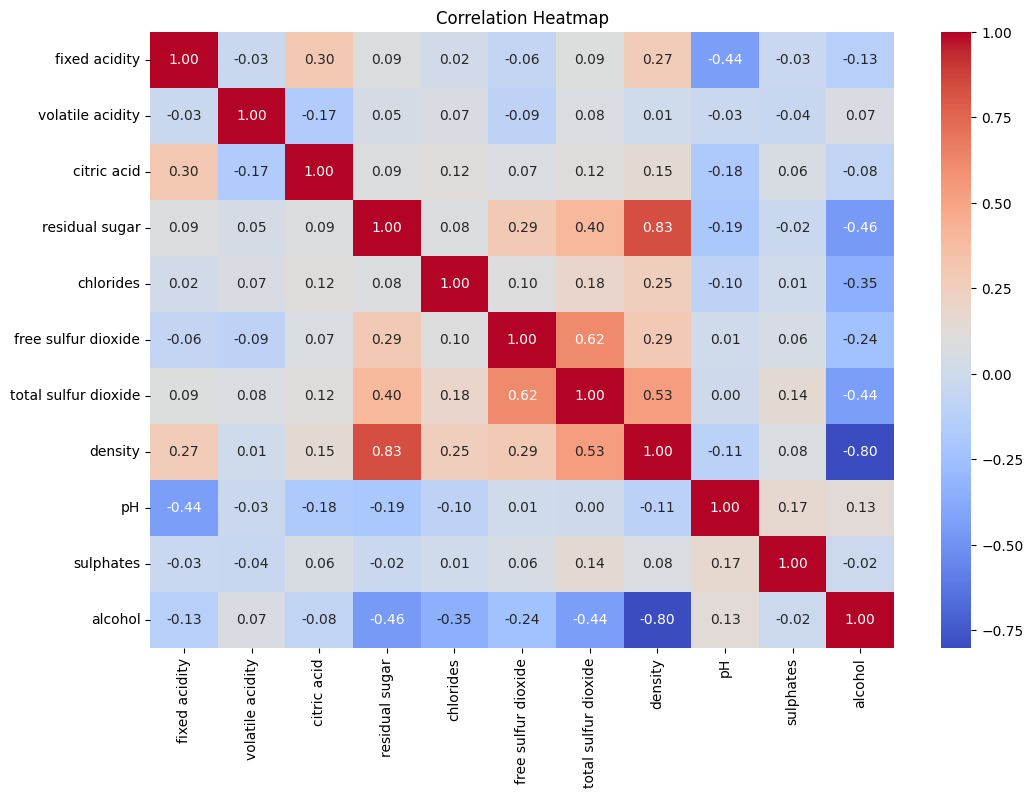

In [ ]:
corr_matrix = X_train_w.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

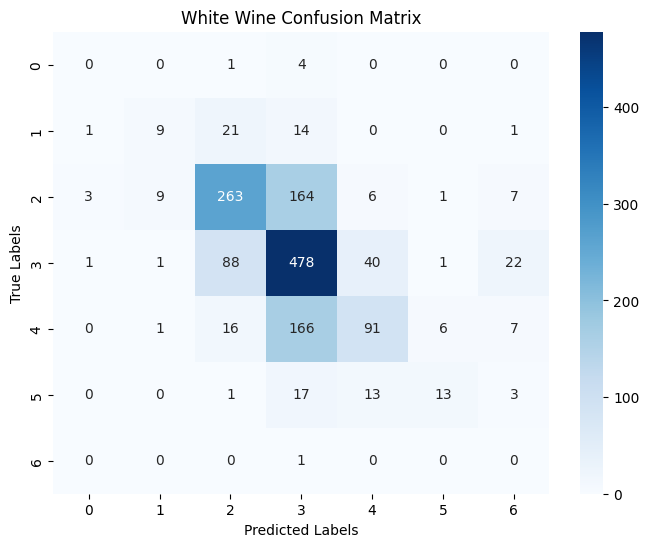

In [ ]:
from sklearn.metrics import confusion_matrix

y_pred_w = final_model_w.predict(X_test_w)
confusion_matrix = confusion_matrix(y_test_w, y_pred_w)
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('White Wine Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

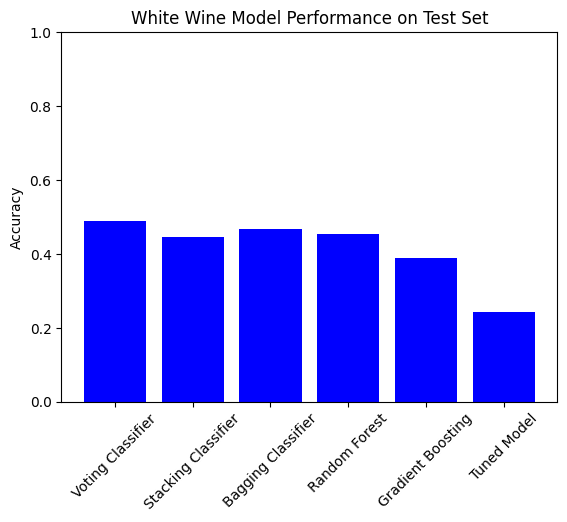

In [ ]:
models = ['Voting Classifier', 'Stacking Classifier', 'Bagging Classifier', 'Random Forest', 'Gradient Boosting', 'Tuned Model']
accuracies = [voting_clf_white.score(X_test_w, y_test_w), stacking_clf.score(X_test_w, y_test_w), bag_clf.score(X_test_w, y_test_w),
              random_classifier.score(X_test_w, y_test_w), hgb_clf.score(X_test_w, y_test_w), final_model.score(X_test_w, y_test_w)]

plt.bar(models, accuracies, color='blue')
plt.ylim(0, 1)
plt.title('White Wine Model Performance on Test Set')
plt.xticks(rotation=45)
plt.ylabel('Accuracy')
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(


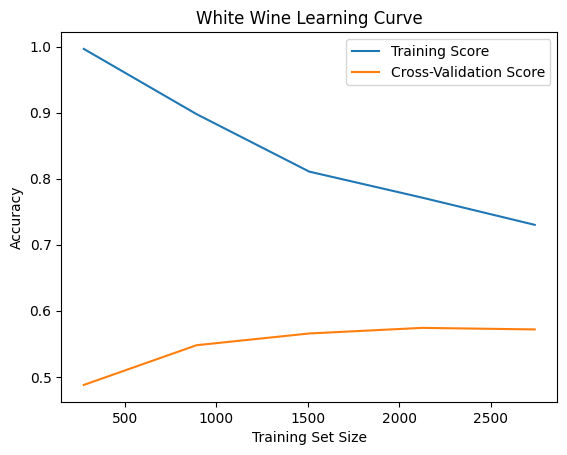

In [ ]:
from sklearn.model_selection import learning_curve

train_sizes_w, train_scores_w, test_scores_w = learning_curve(final_model_w, X_train_w, y_train_w, cv=5)
plt.plot(train_sizes_w, np.mean(train_scores_w, axis=1), label='Training Score')
plt.plot(train_sizes_w, np.mean(test_scores_w, axis=1), label='Cross-Validation Score')
plt.xlabel('Training Set Size')
plt.ylabel('Accuracy')
plt.title('White Wine Learning Curve')
plt.legend()
plt.show()



---



---



# 8. Limitations

During the analysis, a challenge I encountered was the interpretation of critical features for both Red and White wines. The model identified alcohol content, sulfates, and sulfur dioxide as crucial factors for predicting wine quality. However, the model output needed to have granularity, offering limited guidance on the optimal levels of these features for crafting the finest wine.

Additionally, the models exhibited a limitation regarding achieving high accuracy. Whoel, the Root Mean Squared Error (RMSE) was 0.996. The overall accuracy of the models was relatively low.  

Finally, a difficulty I encountered was creating the confusion matrix; my models initially generated False predictions, and I maneuvered around that challenge by implementing the regularization technique Lasso in the pipeline to develop the models.

# 9. Conclusions

The current models used to predict wine quality have shown limited accuracy in capturing the various factors that influence the overall quality of wine. Therefore, it has become critical to explore multiple avenues that can be utilized to enhance the performance of these models. This can be achieved by considering alternative algorithms, feature engineering, or acquiring additional relevant data.

By utilizing these methods, I can create more comprehensive and accurate models that provide a deeper understanding of the nuances that contribute to crafting exceptional wines. This can also help wine producers to identify the most critical factors affecting wine quality and to make informed decisions regarding the production process.

# 10. References

- Awan-Ur-Rahman. “Understanding Soft Voting and Hard Voting: A Comparative Analysis of Ensemble Learning Methods.” Medium, Medium, 2 Aug. 2023, medium.com/@awanurrahman.cse/understanding-soft-voting-and-hard-voting-a-comparative-analysis-of-ensemble-learning-methods-db0663d2c008#:~:text=Ensemble%20techniques%20are%20widely%20used,the%20outputs%20of%20individual%20models.

- R, Sruthi E. “Understand Random Forest Algorithms with Examples (Updated 2024).” Analytics Vidhya, 21 Dec. 2023, www.analyticsvidhya.com/blog/2021/06/understanding-random-forest/#:~:text=Random%20forest%20algorithm%20is%20an,made%20up%20of%20decision%20trees.


- “What Is Bagging?” IBM, www.ibm.com/topics/bagging#:~:text=Bagging%2C%20also%20known%20as%20bootstrap,be%20chosen%20more%20than%20once. Accessed 23 Dec. 2023.

- OpenAI. "ChatGPT: Language Model by OpenAI." OpenAI, 2023, https://www.openai.com/chatgpt.
    - (Model Performance Visualization, Learning Curve, Feature Importance Visualization)